##**Домашнее задание по теме "Временные ряды. Общая теория"**

**Задание:**

1.   Скачайте материалы к занятию.

2.   Проанализируйте 6 временных рядов из папки Series и сделайте их стационарными:

monthly-sales-of-company-x-jan-6.csv

monthly-boston-armed-robberies-j.csv

international-airline-passengers.csv

mean-monthly-air-temperature-deg.csv

weekly-closings-of-the-dowjones-.csv

daily-total-female-births-in-cal.csv

3.   Пришлите решение в виде ссылки на GitHub с ноутбуком.



**Решение:**

# Импорт библиотек и загрузка данных

In [ ]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller


In [ ]:
# Скачиваем данные
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

In [ ]:
import matplotlib.pyplot as plt

# Отображение данных

In [ ]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

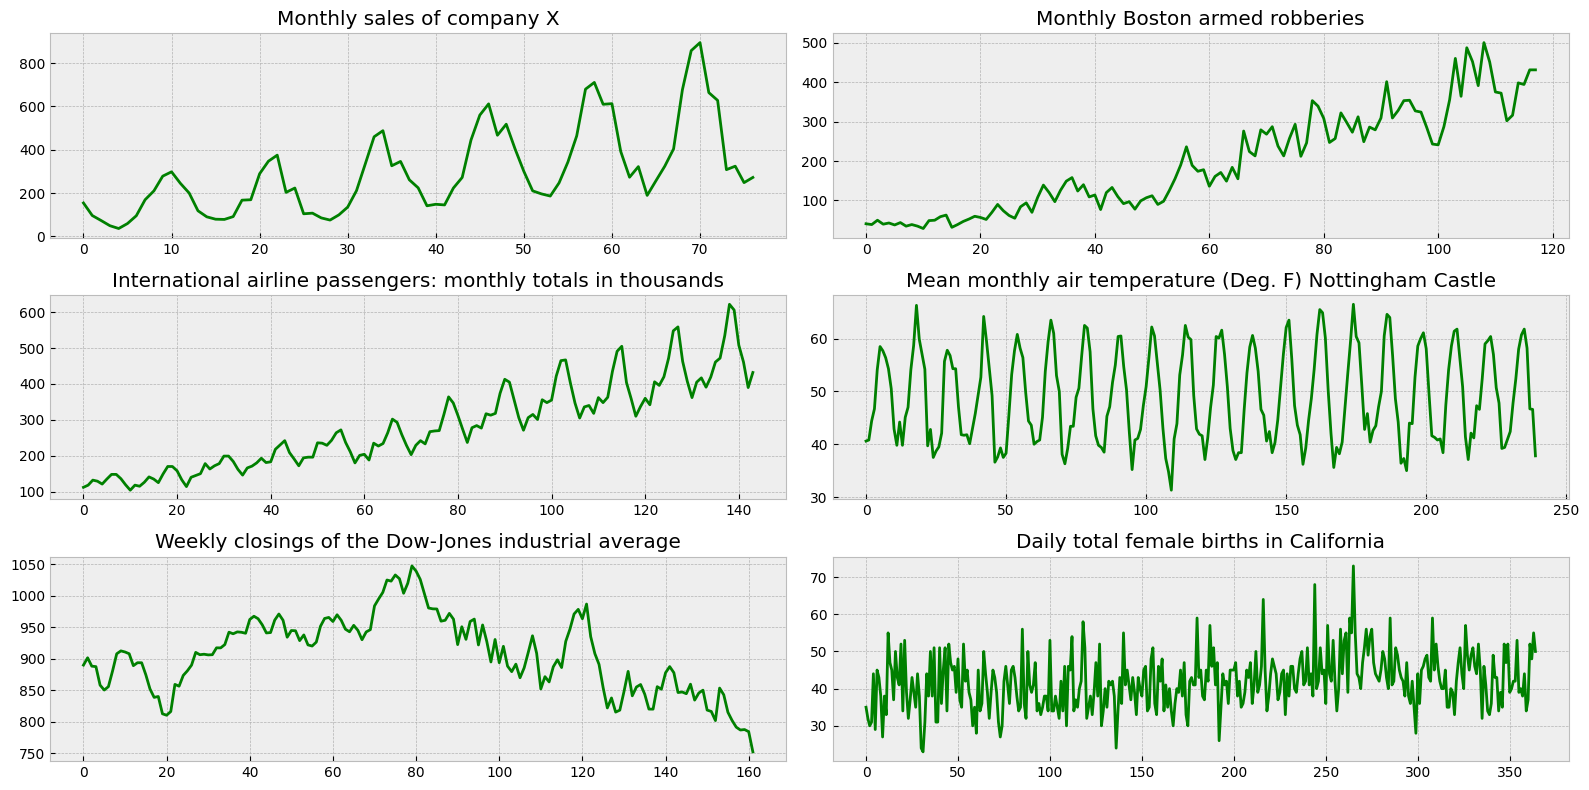

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='green')
        ts_ax.set_title(key)

    plt.tight_layout()

# Функции для визуализации и тестирования на стационарность

In [ ]:
def plot_time_series(series, title):
    plt.figure(figsize=(12, 6))
    plt.plot(series)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid()
    plt.show()

def test_stationarity(ts):
    adf_result = adfuller(ts)
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'   {key}: {value}')

# Анализ временных рядов

In [ ]:
for name, series in all_series.items():
    print(f'{name}:')
    test_stationarity(series)
    print('\n' + '='*50 + '\n')

Monthly sales of company X:
ADF Statistic: 0.6547150829524446
p-value: 0.9888894205170052
Critical Values:
   1%: -3.53692771987915
   5%: -2.907887369384766
   10%: -2.591493291015625


Monthly Boston armed robberies:
ADF Statistic: 1.001102140245781
p-value: 0.994277563805723
Critical Values:
   1%: -3.4936021509366793
   5%: -2.8892174239808703
   10%: -2.58153320754717


International airline passengers: monthly totals in thousands:
ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


Mean monthly air temperature (Deg. F) Nottingham Castle:
ADF Statistic: -3.2554924030863366
p-value: 0.016989030222608604
Critical Values:
   1%: -3.4597521044060353
   5%: -2.874472927517147
   10%: -2.5736628197530864


Weekly closings of the Dow-Jones industrial average:
ADF Statistic: -1.3146254984911683
p-value: 0.6224548515589733
Critical Values:
   1%: -3.471633386932248
   5%: -2.8796651


Проверка на стационарность показала, что Mean Monthly Air Temperature (Deg. F) Nottingham Castle и Daily Total Female Births in California являются стационарными.

# Логарифмическое преобразование

In [ ]:
log_series = {name: np.log(series) for name, series in all_series.items()}

for name, series in log_series.items():
    print(f'{name}:')
    test_stationarity(series)
    print('\n' + '='*50 + '\n')

Monthly sales of company X:
ADF Statistic: -0.9080489952107124
p-value: 0.7853102124849111
Critical Values:
   1%: -3.53692771987915
   5%: -2.907887369384766
   10%: -2.591493291015625


Monthly Boston armed robberies:
ADF Statistic: -2.013160854784127
p-value: 0.2808325035425525
Critical Values:
   1%: -3.492995948509562
   5%: -2.888954648057252
   10%: -2.58139291903223


International airline passengers: monthly totals in thousands:
ADF Statistic: -1.7170170891069683
p-value: 0.4223667747703874
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


Mean monthly air temperature (Deg. F) Nottingham Castle:
ADF Statistic: -3.7609961698895846
p-value: 0.003332556252533208
Critical Values:
   1%: -3.459884913337196
   5%: -2.8745310704320794
   10%: -2.573693840082908


Weekly closings of the Dow-Jones industrial average:
ADF Statistic: -1.2103688093154568
p-value: 0.6691194827577219
Critical Values:
   1%: -3.471633386932248
   5%: -2.87966

Из шести временных рядов, только Mean monthly air temperature и Daily total female births являются стационарными после логарифмирования. Остальные временные ряды требуют дальнейших преобразований для достижения стационарности.

# Первое дифференцирование

In [ ]:
# Создаем дифференцированные временные ряды
differenced_series = {name: series.diff().dropna() for name, series in log_series.items()}


In [ ]:
# Проводим тест на стационарность для differenced_series
for name, series in differenced_series.items():
    print(f'{name}:')
    test_stationarity(series)
    print('\n' + '='*50 + '\n')

Monthly sales of company X:
ADF Statistic: -3.135643801006635
p-value: 0.024025392839875176
Critical Values:
   1%: -3.53692771987915
   5%: -2.907887369384766
   10%: -2.591493291015625


Monthly Boston armed robberies:
ADF Statistic: -7.601792127269042
p-value: 2.3786024417437596e-11
Critical Values:
   1%: -3.489589552580676
   5%: -2.887477210140433
   10%: -2.580604145195395


International airline passengers: monthly totals in thousands:
ADF Statistic: -2.717130598388114
p-value: 0.07112054815086184
Critical Values:
   1%: -3.4825006939887997
   5%: -2.884397984161377
   10%: -2.578960197753906


Mean monthly air temperature (Deg. F) Nottingham Castle:
ADF Statistic: -12.14225999456985
p-value: 1.6407281304676633e-22
Critical Values:
   1%: -3.4594900381360034
   5%: -2.8743581895178485
   10%: -2.573601605503697


Weekly closings of the Dow-Jones industrial average:
ADF Statistic: -12.995820716080098
p-value: 2.7516091322913448e-24
Critical Values:
   1%: -3.4718957209472654
   

После первого дифференцирования все временные ряды стали стационарными, кроме international airline passengers: monthly totals in thousands.

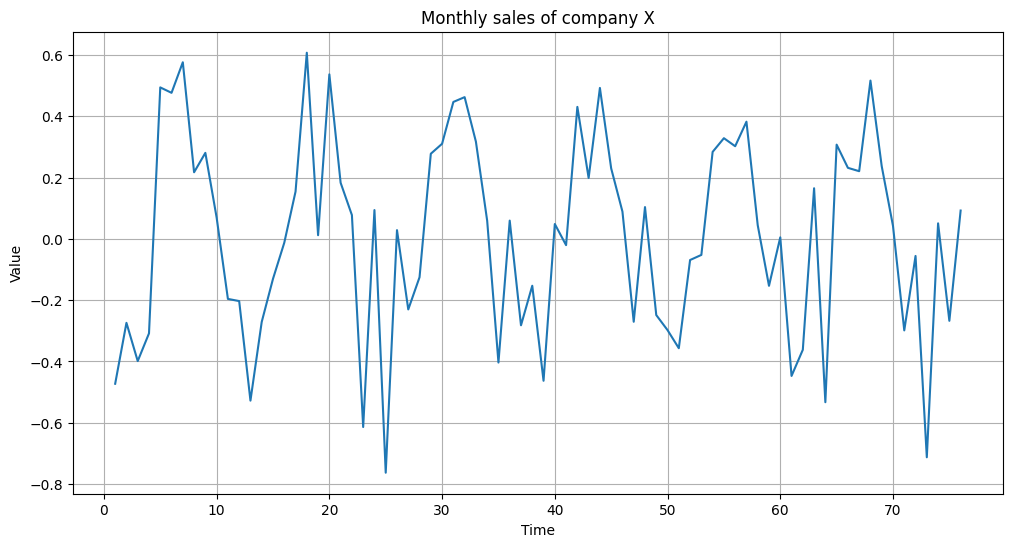

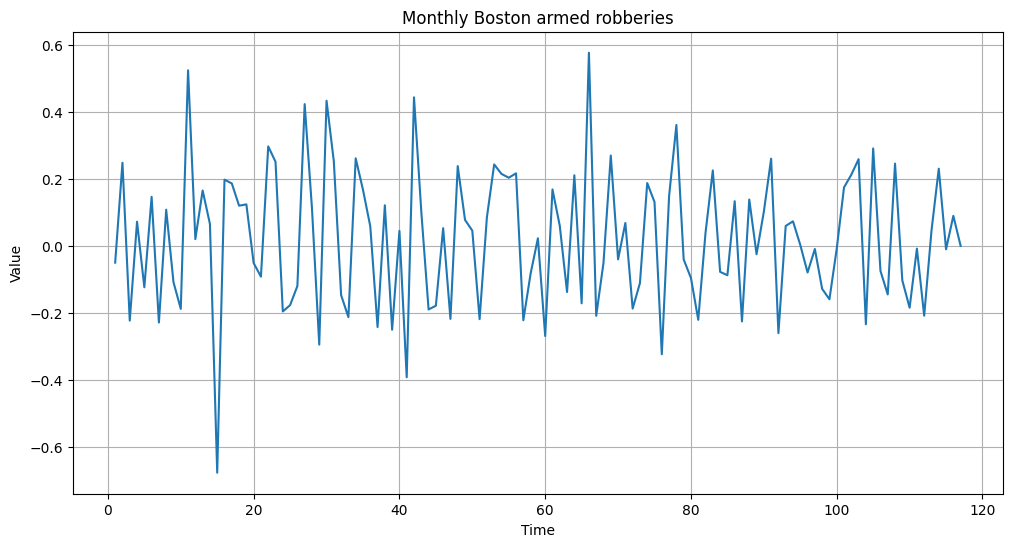

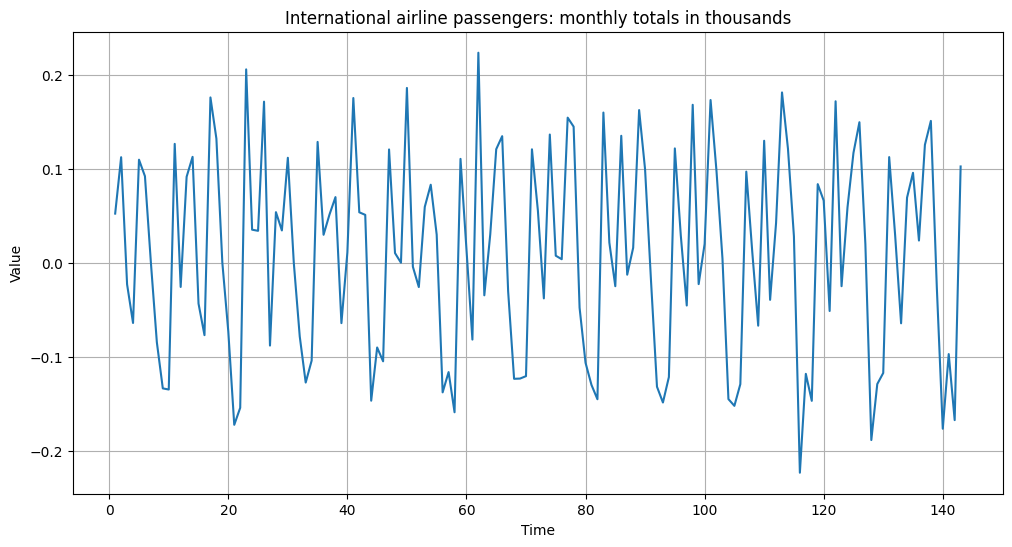

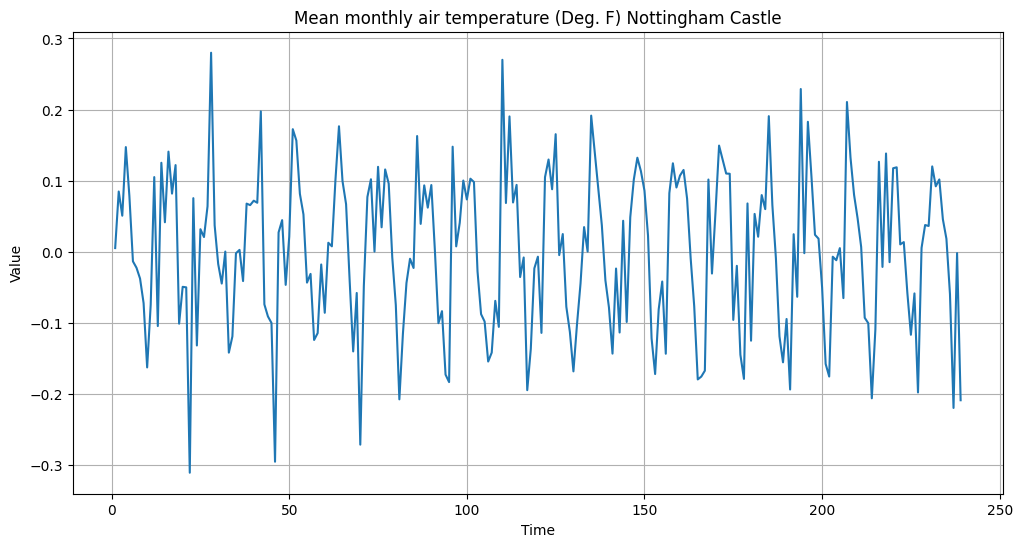

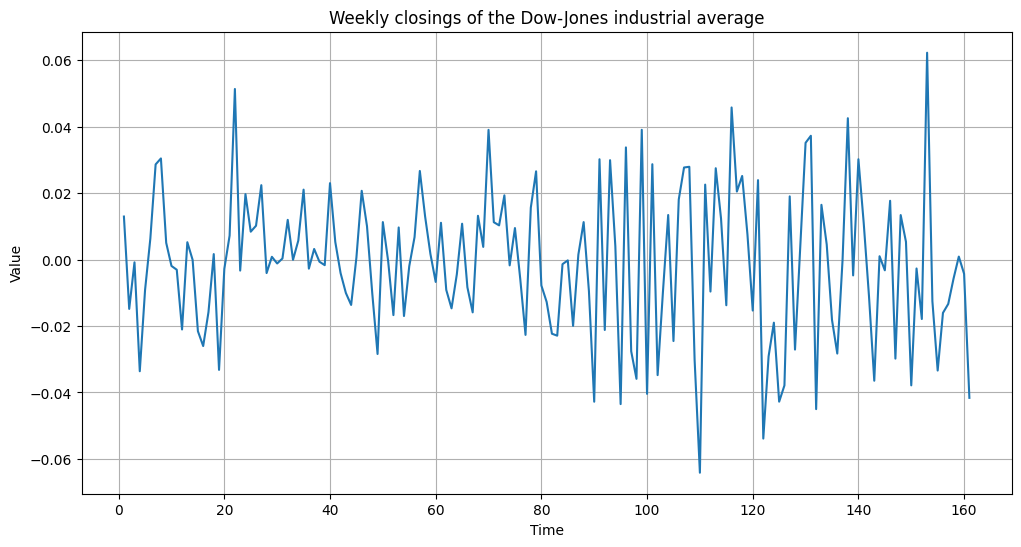

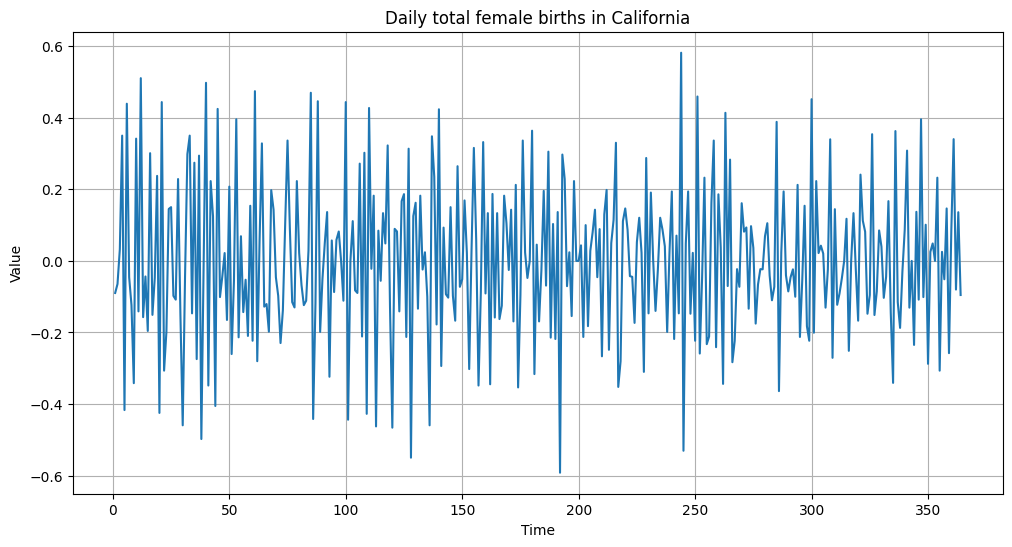

In [ ]:
# Визуализация
for name, series in differenced_series.items():
    plot_time_series(series, name)

# Второе дифференцирование

In [ ]:
# Осуществим повторное дифференцирование для временного ряда, оставшегося нестационарным после предыдущих этапов
second_differenced_series = differenced_series['International airline passengers: monthly totals in thousands'].diff().dropna()
test_stationarity(second_differenced_series)

ADF Statistic: -8.19662913218224
p-value: 7.419304549376186e-13
Critical Values:
   1%: -3.4825006939887997
   5%: -2.884397984161377
   10%: -2.578960197753906


После повторного дифференцирования временной ряд "International airline passengers" стал стационарным.

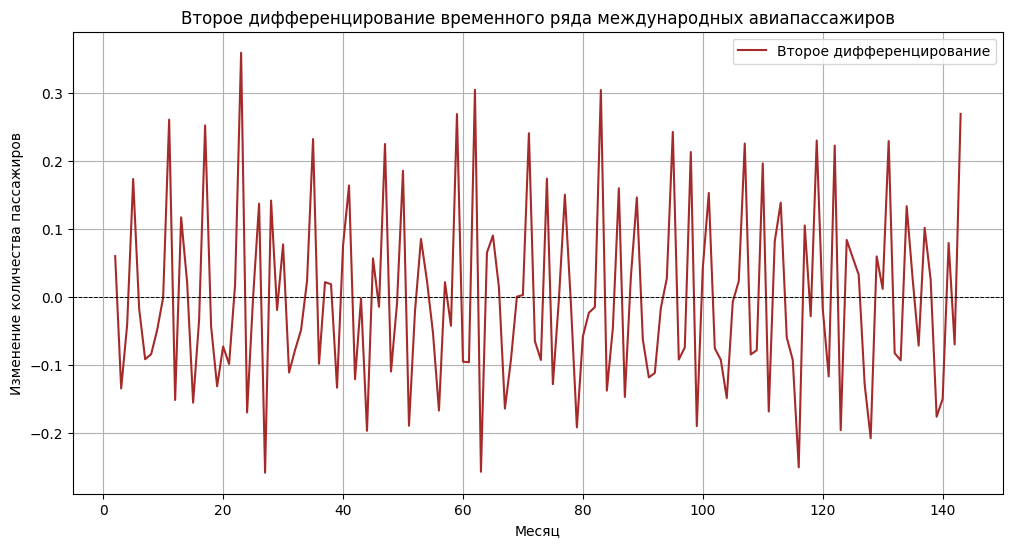

In [ ]:
plt.figure(figsize=(12, 6))

# Построение графика второго дифференцированного ряда
plt.plot(second_differenced_series, color='brown', label='Второе дифференцирование')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.title('Второе дифференцирование временного ряда международных авиапассажиров')
plt.xlabel('Месяц')
plt.ylabel('Изменение количества пассажиров')
plt.legend()
plt.grid()

# Показ графика
plt.show()